In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data from txt files
# d = depth; p = profile
d_edep = np.loadtxt(r'output/Seg2_Sim/gamma-depth-Edep.txt')
d_uncert = np.loadtxt(r'output/Seg2_Sim/gamma-depth-Edep-Uncertainty.txt')
p_edep = np.loadtxt(r'output/Seg2_Sim/gamma-profile-Edep.txt')
p_uncert = np.loadtxt(r'output/Seg2_Sim/gamma-profile-Edep-Uncertainty.txt')
f_static = open(r'output/Seg2_Sim/S2_Static.txt')

FileNotFoundError: output/Seg2_Sim/gamma-depth-Edep.txt not found.

In [3]:
# Simulation
l_static = f_static.readlines()
for line in l_static:
        print(line)

# NumberOfRun    = 1

# NumberOfEvents = 10000000

# NumberOfTracks = 42615343

# NumberOfSteps  = 195132148

# NumberOfGeometricalSteps  = 42890836

# NumberOfPhysicalSteps     = 152241312

# ElapsedTime           = 722.847

# ElapsedTimeWoInit     = 720.832

# StartDate             = Sun Sep 11 13:38:54 2022

# EndDate               = Sun Sep 11 13:50:57 2022

# StartSimulationTime        = 0

# StopSimulationTime         = 1

# CurrentSimulationTime      = 1

# VirtualStartSimulationTime = 0

# VirtualStopSimulationTime  = 1

# ElapsedSimulationTime      = 1

# PPS (Primary per sec)      = 13872.9

# TPS (Track per sec)        = 59119.7

# SPS (Step per sec)         = 270704



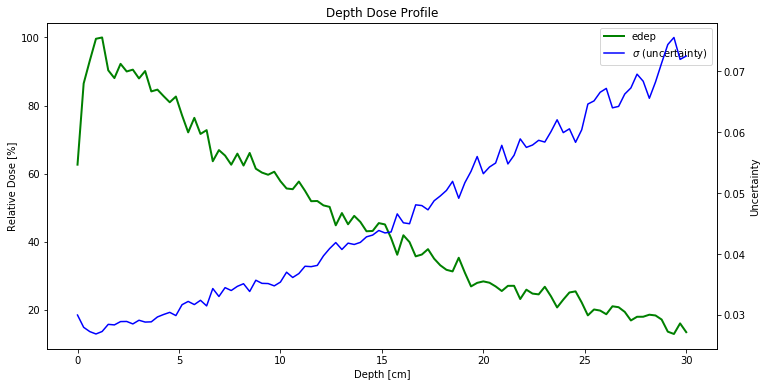

In [4]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

# X values from 0 to n, n is the length of d_edep
n = len(d_edep)
x = np.linspace(0, 30, n)

# First curve, gamma depth in green
y = d_edep
y = np.flip(y)
y = 100*y/y.max()
c1 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Second curve, gamma uncertainty in blue, share the same x axis, but use a
# different y axis
y = d_uncert
y = np.flip(y)
ax2 = ax.twinx()
c2 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c1+c2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Depth Dose Profile')
ax.set_xlabel('Depth [cm]')
ax.set_ylabel('Relative Dose [%]')
f = ax2.set_ylabel('Uncertainty')

# save on disk (optional)
plt.savefig('output/depth_dose.png',dpi=300,bbox_inches="tight",pad_inches=None)

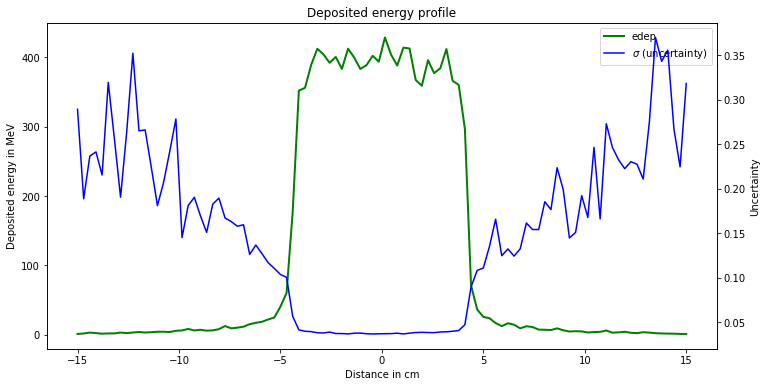

In [5]:
# Declare a figure 
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

# Third curve, gamma profile in green
n = len(p_edep)
x = np.linspace(-15, 15, n)
y = p_edep
c3 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Last curve, gamma uncertainty profile
y = p_uncert
ax2 = ax.twinx()
c4 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c3+c4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Deposited energy profile')
ax.set_xlabel('Distance in cm')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')
# save on disk (optional)
plt.savefig('output/profile_dose.png',dpi=300,bbox_inches="tight",pad_inches=None)

In [6]:
!pip install SimpleITK
import SimpleITK as sitk
img_ct = sitk.ReadImage(r'')
arr_ct = sitk.GetArrayFromImage(img_ct)
filter = sitk.RescaleIntensityImageFilter()
filter.SetOutputMaximum(1.0)
filter.SetOutputMinimum(0.0)
img_dose = filter.Execute(img_dose)
arr_dose = sitk.GetArrayFromImage(img_dose)
print('Image size = ', arr_dose.shape)
print('Image min and max: ',  np.amin(arr_dose), np.amax(arr_dose))

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "" does not exist.